# Joins In Python
a: Inner Join in Pandas <br>
b: Full Join in Pandas <br>
c: Left Join in Pandas<br>
d: Right Join in Pandas <br>

 We’ll take a simple problem from a related marketing brand here. We are given two tables – one which contains data about products and the other that has customer-level information.

We will use these tables to understand how the different types of joins work using Pandas.


# Inner Join

Inner join is the most common type of join you’ll be working with. It returns a dataframe with only those rows that have common characteristics.

In [39]:
# Coding Part::

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
product=pd.DataFrame({
    'Product_ID':[101,102,103,104,105,106,107],
    'Product_name':['Watch','Bag','Shoes','Smartphone','Books','Oil','Laptop'],
    'Category':['Fashion','Fashion','Fashion','Electronics','Study','Grocery','Electronics'],
    'Price':[299.0,1350.50,2999.0,14999.0,145.0,110.0,79999.0],
    'Seller_City':['Delhi','Mumbai','Chennai','Kolkata','Delhi','Chennai','Bengalore']
})

In [3]:
product.head()

,Product_ID,Product_name,Category,Price,Seller_City
0,101,Watch,Fashion,299.0,Delhi
1,102,Bag,Fashion,1350.5,Mumbai
2,103,Shoes,Fashion,2999.0,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata
4,105,Books,Study,145.0,Delhi


In [4]:
customer=pd.DataFrame({
    'id':[1,2,3,4,5,6,7,8,9],
    'name':['Olivia','Aditya','Cory','Isabell','Dominic','Tyler','Samuel','Daniel','Jeremy'],
    'age':[20,25,15,10,30,65,35,18,23],
    'Product_ID':[101,0,106,0,103,104,0,0,107],
    'Purchased_Product':['Watch','NA','Oil','NA','Shoes','Smartphone','NA','NA','Laptop'],
    'City':['Mumbai','Delhi','Bangalore','Chennai','Chennai','Delhi','Kolkata','Delhi','Mumbai']
})

In [5]:
customer.head()

,id,name,age,Product_ID,Purchased_Product,City
0,1,Olivia,20,101,Watch,Mumbai
1,2,Aditya,25,0,NA,Delhi
2,3,Cory,15,106,Oil,Bangalore
3,4,Isabell,10,0,NA,Chennai
4,5,Dominic,30,103,Shoes,Chennai


Task 1-Let’s say we want to know about all the products sold online and who purchased them. We can get this easily using an inner join.

In [7]:
#code 
pd.merge(product,customer,on='Product_ID')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1,Olivia,20,Watch,Mumbai
1,103,Shoes,Fashion,2999.0,Chennai,5,Dominic,30,Shoes,Chennai
2,104,Smartphone,Electronics,14999.0,Kolkata,6,Tyler,65,Smartphone,Delhi
3,106,Oil,Grocery,110.0,Chennai,3,Cory,15,Oil,Bangalore
4,107,Laptop,Electronics,79999.0,Bengalore,9,Jeremy,23,Laptop,Mumbai


Task 2: to know about all the products sold by the seller to the same city i.e., seller and customer both belong to the same city.

In [11]:
#code 
pd.merge(product,customer,how='inner',left_on=['Product_ID', 'Seller_City'], right_on=['Product_ID', 'City'])

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,103,Shoes,Fashion,2999.0,Chennai,5,Dominic,30,Shoes,Chennai




# Full Join

Full Join, also known as Full Outer Join, returns all those records which either have a match in the left or right dataframe.

In [13]:
#code 

pd.merge(product,customer,on='Product_ID',how='outer')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1.0,Olivia,20.0,Watch,Mumbai
1,102,Bag,Fashion,1350.5,Mumbai,NaN,NaN,NaN,NaN,NaN
2,103,Shoes,Fashion,2999.0,Chennai,5.0,Dominic,30.0,Shoes,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata,6.0,Tyler,65.0,Smartphone,Delhi
4,105,Books,Study,145.0,Delhi,NaN,NaN,NaN,NaN,NaN
5,106,Oil,Grocery,110.0,Chennai,3.0,Cory,15.0,Oil,Bangalore
6,107,Laptop,Electronics,79999.0,Bengalore,9.0,Jeremy,23.0,Laptop,Mumbai
7,0,NaN,NaN,NaN,NaN,2.0,Aditya,25.0,NA,Delhi
8,0,NaN,NaN,NaN,NaN,4.0,Isabell,10.0,NA,Chennai
9,0,NaN,NaN,NaN,NaN,7.0,Samuel,35.0,NA,Kolkata


Did you notice what happened here? All the non-matching rows of both the dataframes have NaN values for the columns of other dataframes. But wait – we still don’t know which row belongs to which dataframe.

For this, Pandas provides us with a fantastic solution. We just have to mention the indicator argument as True in the function, and a new column of name _merge will be created in the resulting dataframe:

In [15]:
pd.merge(product,customer,on='Product_ID',how='outer',indicator=True)

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City,_merge
0,101,Watch,Fashion,299.0,Delhi,1.0,Olivia,20.0,Watch,Mumbai,both
1,102,Bag,Fashion,1350.5,Mumbai,NaN,NaN,NaN,NaN,NaN,left_only
2,103,Shoes,Fashion,2999.0,Chennai,5.0,Dominic,30.0,Shoes,Chennai,both
3,104,Smartphone,Electronics,14999.0,Kolkata,6.0,Tyler,65.0,Smartphone,Delhi,both
4,105,Books,Study,145.0,Delhi,NaN,NaN,NaN,NaN,NaN,left_only
5,106,Oil,Grocery,110.0,Chennai,3.0,Cory,15.0,Oil,Bangalore,both
6,107,Laptop,Electronics,79999.0,Bengalore,9.0,Jeremy,23.0,Laptop,Mumbai,both
7,0,NaN,NaN,NaN,NaN,2.0,Aditya,25.0,NA,Delhi,right_only
8,0,NaN,NaN,NaN,NaN,4.0,Isabell,10.0,NA,Chennai,right_only
9,0,NaN,NaN,NaN,NaN,7.0,Samuel,35.0,NA,Kolkata,right_only


As you can see, the _merge column mentions which row belongs to which dataframe.






# left Joins in Pandas



Now, let’s say the leadership team wants information about only those customers who bought something from us. You guessed it – we can use the concept of Left Join here.

Left join, also known as Left Outer Join, returns a dataframe containing all the rows of the left dataframe.

All the non-matching rows of the left dataframe contain NaN for the columns in the right dataframe. It is simply an inner join plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe.

In [17]:
pd.merge(product,customer,on='Product_ID',how='left')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1.0,Olivia,20.0,Watch,Mumbai
1,102,Bag,Fashion,1350.5,Mumbai,NaN,NaN,NaN,NaN,NaN
2,103,Shoes,Fashion,2999.0,Chennai,5.0,Dominic,30.0,Shoes,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata,6.0,Tyler,65.0,Smartphone,Delhi
4,105,Books,Study,145.0,Delhi,NaN,NaN,NaN,NaN,NaN
5,106,Oil,Grocery,110.0,Chennai,3.0,Cory,15.0,Oil,Bangalore
6,107,Laptop,Electronics,79999.0,Bengalore,9.0,Jeremy,23.0,Laptop,Mumbai


Here, you can clearly see that all the unsold products contain NaN for the columns belonging to the customer dataframe

# Right Join in Pandas

Similarly, if we want to create a table of customers including the information about the products they bought, we can use the right join.

Right join, also known as Right Outer Join, is similar to the Left Outer Join. The only difference is that all the rows of the right dataframe are taken as it is and only those of the left dataframe that are common in both.

In [19]:
# code

pd.merge(product,customer,on='Product_ID',how='right')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1,Olivia,20,Watch,Mumbai
1,0,NaN,NaN,NaN,NaN,2,Aditya,25,NA,Delhi
2,106,Oil,Grocery,110.0,Chennai,3,Cory,15,Oil,Bangalore
3,0,NaN,NaN,NaN,NaN,4,Isabell,10,NA,Chennai
4,103,Shoes,Fashion,2999.0,Chennai,5,Dominic,30,Shoes,Chennai
5,104,Smartphone,Electronics,14999.0,Kolkata,6,Tyler,65,Smartphone,Delhi
6,0,NaN,NaN,NaN,NaN,7,Samuel,35,NA,Kolkata
7,0,NaN,NaN,NaN,NaN,8,Daniel,18,NA,Delhi
8,107,Laptop,Electronics,79999.0,Bengalore,9,Jeremy,23,Laptop,Mumbai


# Handling Redundancy/Duplicates in Joins
Duplicate values can be tricky obstacles. They can cause problems while performing joins. These values won’t give an error but will simply create redundancy in our resulting dataframe. I’m sure you can imagine how harmful that can be!

In [23]:
product_dup=pd.DataFrame({
'Product_ID':[101,102,103,104,105,106,107,103,107],
'Product_name':['Watch','Bag','Shoes','Smartphone','Books','Oil','Laptop','Shoes','Laptop'],
'Category':['Fashion','Fashion','Fashion','Electronics','Study','Grocery','Electronics','Fashion','Electronics'],
'Price':[299.0,1350.50,2999.0,14999.0,145.0,110.0,79999.0,2999.0,79999.0],
'Seller_City':['Delhi','Mumbai','Chennai','Kolkata','Delhi','Chennai','Bengalore','Chennai','Bengalore']
})

In [27]:
product_dup.head(10)

,Product_ID,Product_name,Category,Price,Seller_City
0,101,Watch,Fashion,299.0,Delhi
1,102,Bag,Fashion,1350.5,Mumbai
2,103,Shoes,Fashion,2999.0,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata
4,105,Books,Study,145.0,Delhi
5,106,Oil,Grocery,110.0,Chennai
6,107,Laptop,Electronics,79999.0,Bengalore
7,103,Shoes,Fashion,2999.0,Chennai
8,107,Laptop,Electronics,79999.0,Bengalore


As you can see, we have duplicate rows in the resulting dataset as well. To solve this, there is a validate argument in the merge() function, which we can set to ‘one_to_one’, ‘one_to_many’, ‘many_to_one’, and ‘many_to_many’.

This ensures that there exists only a particular mapping across both the dataframes. If the mapping condition is not satisfied, then it throws a MergeError. To solve this, we can delete duplicates before applying join:

In [33]:
# Using Drop_duplicates to drop duplicated data 
product_dup.drop_duplicates()

,Product_ID,Product_name,Category,Price,Seller_City
0,101,Watch,Fashion,299.0,Delhi
1,102,Bag,Fashion,1350.5,Mumbai
2,103,Shoes,Fashion,2999.0,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata
4,105,Books,Study,145.0,Delhi
5,106,Oil,Grocery,110.0,Chennai
6,107,Laptop,Electronics,79999.0,Bengalore


But, if you want to keep these duplicates, then you can give validate values as per your requirements and it will not throw an error:

In [37]:
pd.merge(product_dup,customer,how='inner', on = 'Product_ID', validate='many_to_many')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1,Olivia,20,Watch,Mumbai
1,103,Shoes,Fashion,2999.0,Chennai,5,Dominic,30,Shoes,Chennai
2,103,Shoes,Fashion,2999.0,Chennai,5,Dominic,30,Shoes,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata,6,Tyler,65,Smartphone,Delhi
4,106,Oil,Grocery,110.0,Chennai,3,Cory,15,Oil,Bangalore
5,107,Laptop,Electronics,79999.0,Bengalore,9,Jeremy,23,Laptop,Mumbai
6,107,Laptop,Electronics,79999.0,Bengalore,9,Jeremy,23,Laptop,Mumbai


# Now You Can Say 

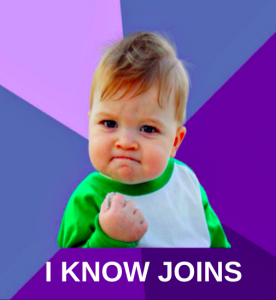


# Conclusion